Considere uma cadeia unidimensional composta por N átomos, todos com a mesma massa m, conectados por molas que alternam entre duas constantes elásticas: k e três vezes k. O sistema deve ser analisado sob condições de contorno com pontas livres, ou seja, as extremidades da cadeia não estão presas.

In [ ]:
%pip install tqdm

import numpy as np
from numpy import array 
from scipy.linalg import eigh 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time 

In [82]:
#================================ Condições Iniciais =====================================
m=1.0 #Massa dos atomos
k= 1 #Constante de mola do primeiro oscilador #Constante de mola do segundo oscilador
N= 100 #Número de atomos 

In [83]:
# Matriz de massa
M = m * np.eye(N)

#=========================================== Caso Molas Iguais (k) ===========================================
# Vetor de constantes das molas (todas iguais a k)
k_springs_equal = [k] * (N - 1)
# Construir matriz de rigidez K1 (tridiagonal simétrica)
K1 = np.zeros((N, N))
# Diagonal principal
K1[0, 0] = k_springs_equal[0]                       # Primeiro átomo
K1[-1, -1] = k_springs_equal[-1]                     # Último átomo
for i in range(1, N - 1):
    K1[i, i] = k_springs_equal[i - 1] + k_springs_equal[i] 
# Subdiagonal e superdiagonal
for i in range(N - 1):
    K1[i, i + 1] = -k_springs_equal[i]                # Superdiagonal
    K1[i + 1, i] = -k_springs_equal[i] 
                  
# Resolver problema de autovalor
autovalores1, autovetores1 = eigh(K1, M)
frequencias1 = np.sqrt(np.abs(autovalores1))
idx1 = np.argsort(frequencias1)
frequencias_ordenadas1 = frequencias1[idx1]
autovetores_ordenados1 = autovetores1[:, idx1].real
autovetores_norm1 = autovetores_ordenados1 / np.linalg.norm(autovetores_ordenados1, axis=0)
#=========================================== Caso Molas Alternadas (k e 3k) ===================================
# Vetor de constantes das molas alternadas (k, 3k, k, 3k, ...)
k_springs_alt = [k if i % 2 == 0 else 3 * k for i in range(N - 1)]

# Construir matriz de rigidez K2 (tridiagonal simétrica)
K2 = np.zeros((N, N))
# Diagonal principal
K2[0, 0] = k_springs_alt[0]                         # Primeiro átomo
K2[-1, -1] = k_springs_alt[-1]                       # Último átomo
for i in range(1, N - 1):
    K2[i, i] = k_springs_alt[i - 1] + k_springs_alt[i]  # Átomos internos
# Subdiagonal e superdiagonal
for i in range(N - 1):
    K2[i, i + 1] = -k_springs_alt[i]                 # Superdiagonal
    K2[i + 1, i] = -k_springs_alt[i]
            
# Resolver problema de autovalor
autovalores2, autovetores2 = eigh(K2, M)
frequencias2 = np.sqrt(np.abs(autovalores2))
idx2 = np.argsort(frequencias2)
frequencias_ordenadas2 = frequencias2[idx2]
autovetores_ordenados2 = autovetores2[:, idx2].real
autovetores_norm2 = autovetores_ordenados2 / np.linalg.norm(autovetores_ordenados2, axis=0)

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\fiore\AppData\Local\Temp\ipykernel_240\3970672762.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Densidade de estados por $\omega^2$')


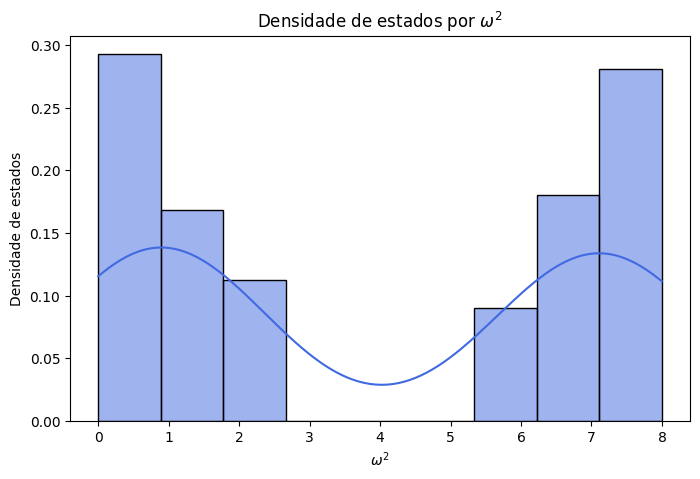

In [84]:
#=========================================== Plotando os resultados ===========================================
plt.figure(figsize=(8, 5))
omega2 = frequencias_ordenadas2**2
sns.histplot(omega2, bins=9, kde=True, stat='density', color='royalblue')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados por $\omega^2$')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\fiore\AppData\Local\Temp\ipykernel_240\3149215736.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Densidade de estados por $\omega^2$')


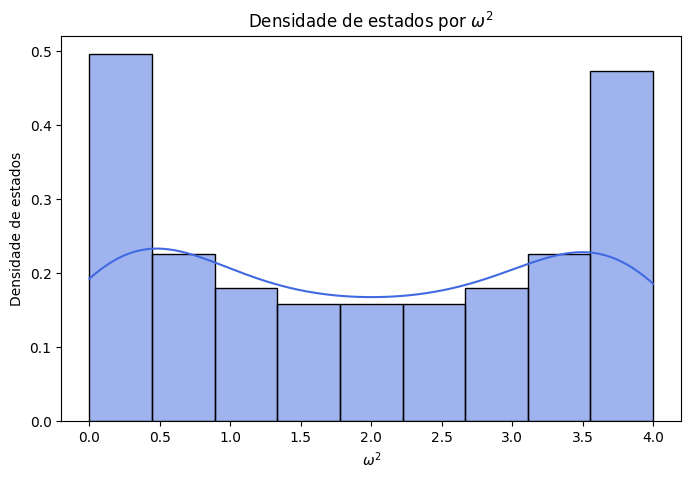

In [85]:
#=========================================== Plotando os resultados ===========================================
plt.figure(figsize=(8, 5))
omega1= frequencias_ordenadas1**2
sns.histplot(omega1, bins=9, kde=True, stat='density', color='royalblue')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados por $\omega^2$')
plt.show()

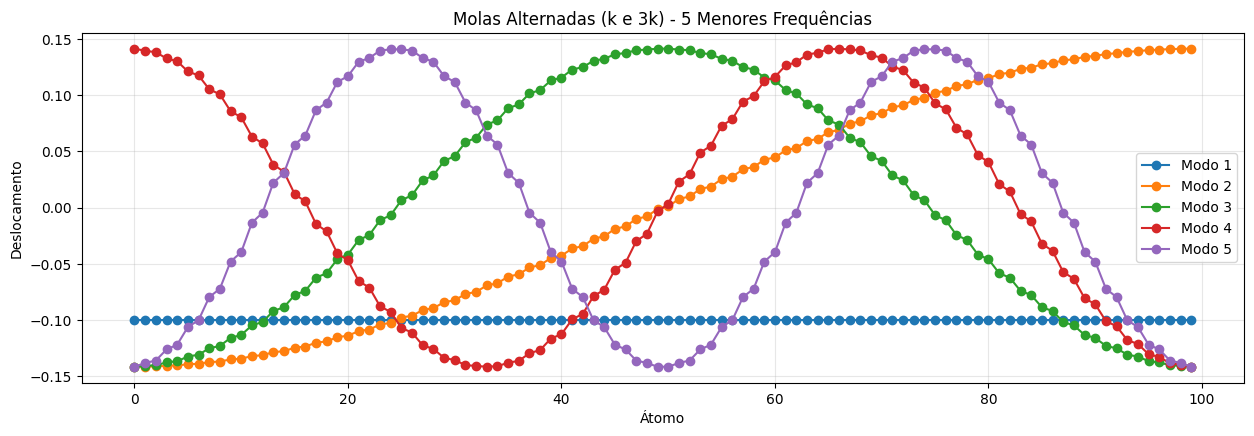

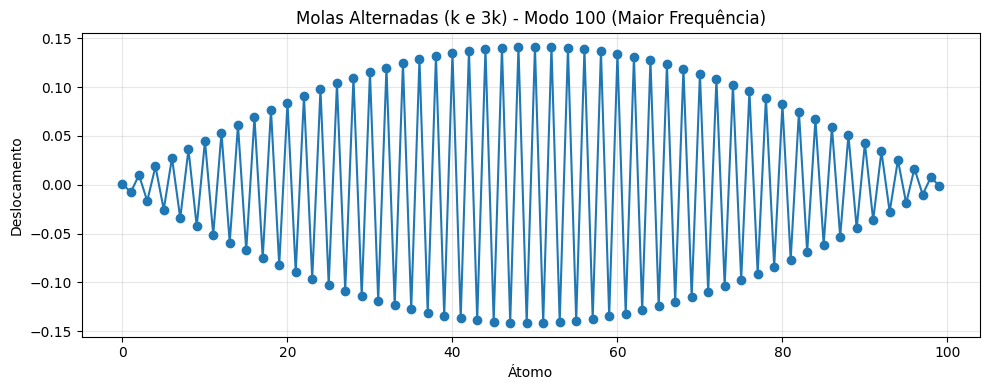

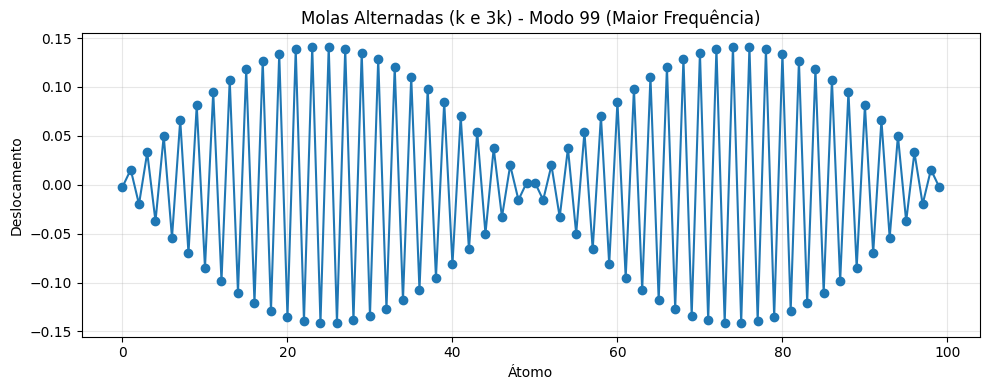

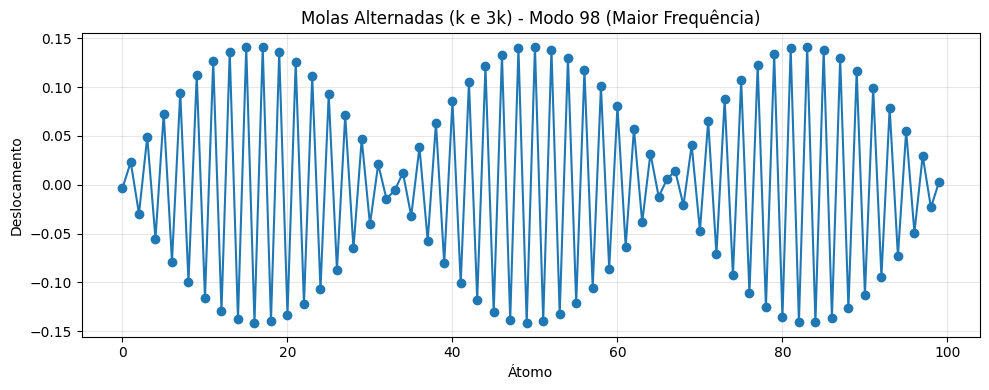

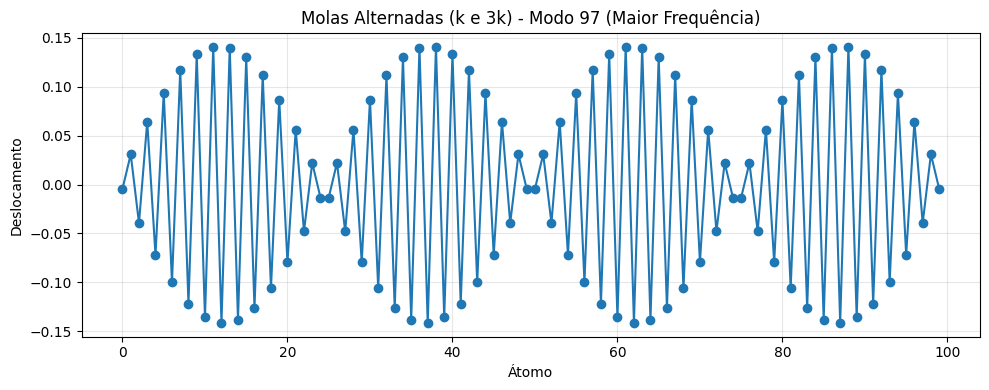

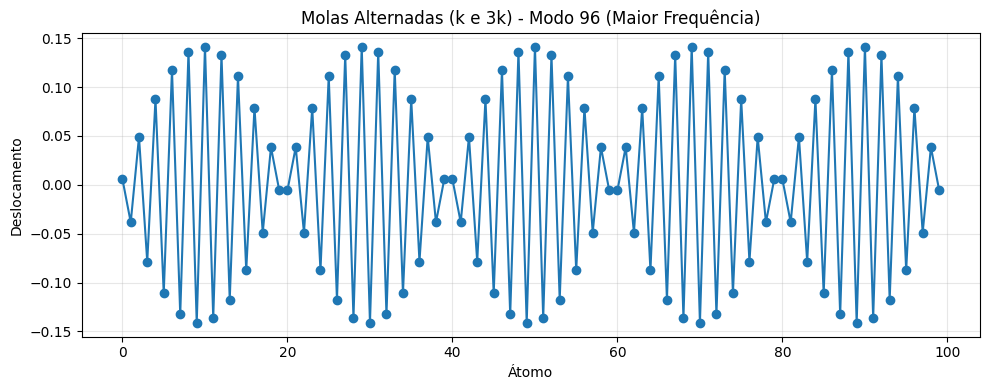

In [86]:
def plot_modes(autovetores2, idx, title, N, case):
    plt.figure(figsize=(15, 10))
    
    # 5 menores frequências
    plt.subplot(2, 1, 1)
    plt.title(f'{title} - 5 Menores Frequências')
    for i in range(5):
        mode = autovetores2[:, idx[i]]
        plt.plot(np.arange(N), mode, 'o-', label=f'Modo {i+1}')
    plt.xlabel('Átomo')
    plt.ylabel('Deslocamento')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
        # 5 maiores frequências em gráficos separados
    for i in range(1, 6):
        plt.figure(figsize=(10, 4))
        mode = autovetores2[:, idx[-i]]
        plt.plot(np.arange(N), mode, 'o-')
        plt.title(f'{title} - Modo {N-i+1} (Maior Frequência)')
        plt.xlabel('Átomo')
        plt.ylabel('Deslocamento')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

# Gerar gráficos
plot_modes(autovetores_ordenados2, idx2, 'Molas Alternadas (k e 3k)', N, 'alternadas')

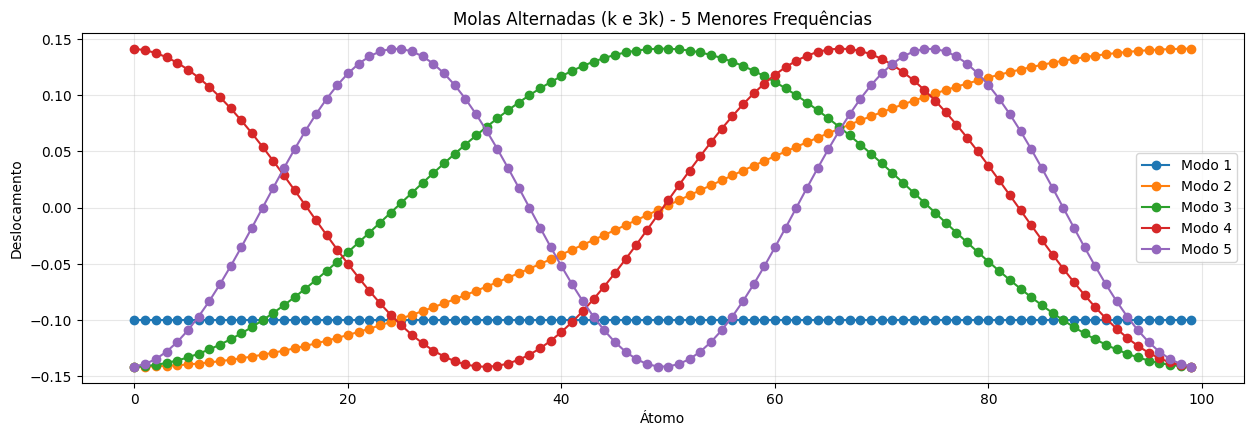

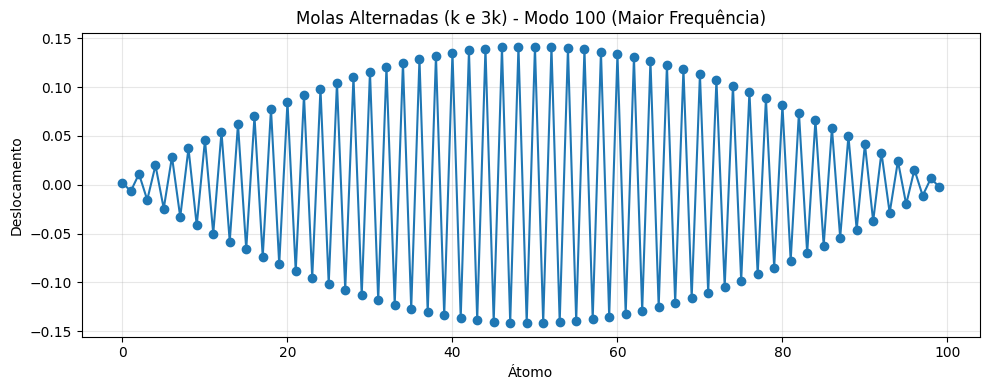

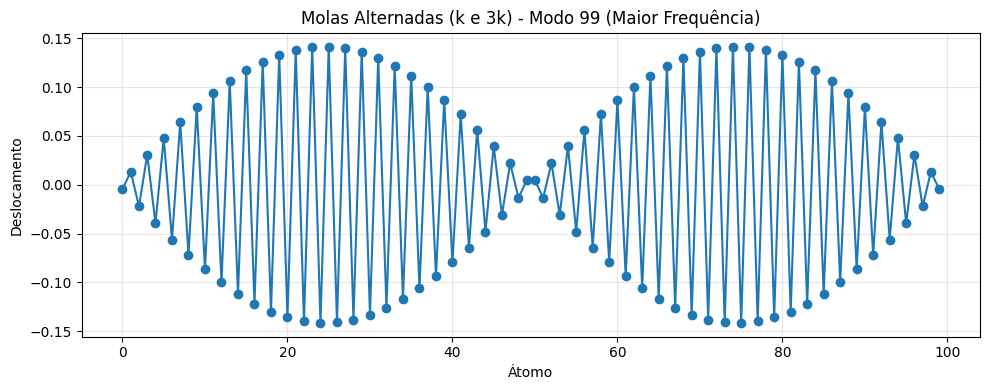

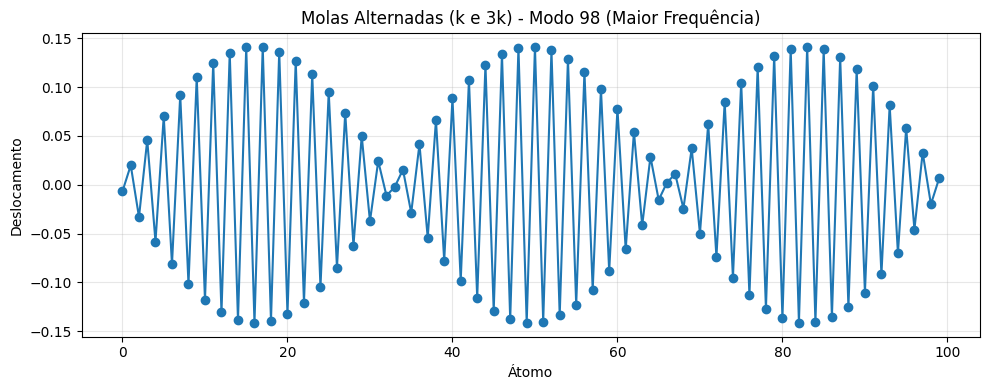

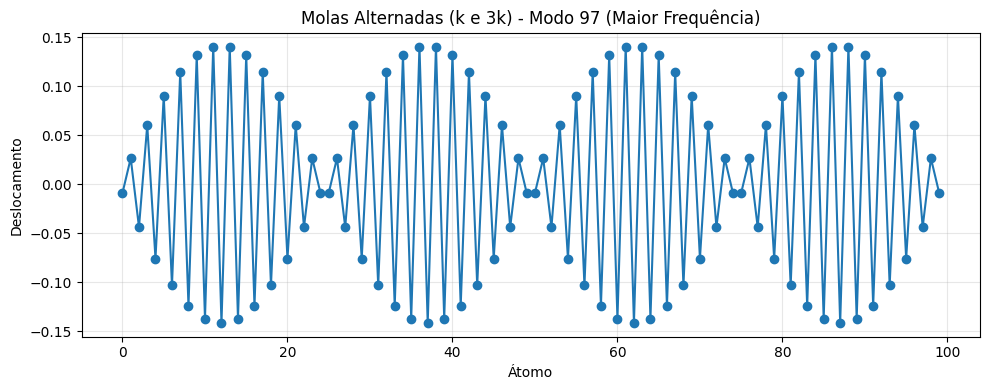

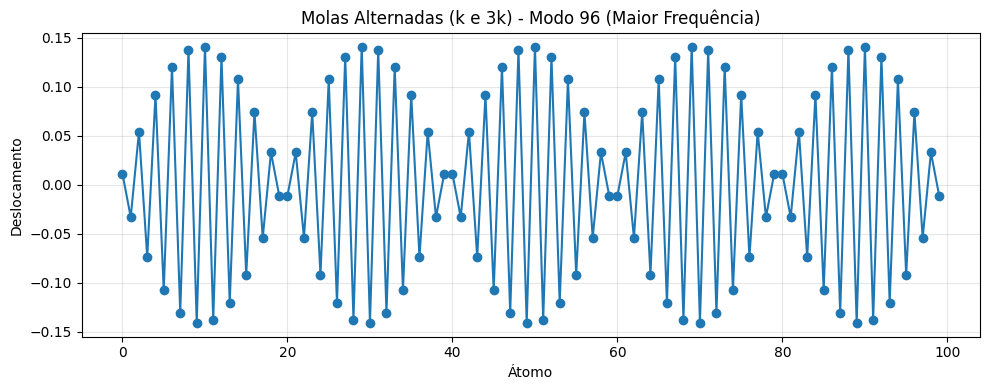

In [87]:
def plot_modes(autovetores1, idx, title, N, case):
    plt.figure(figsize=(15, 10))
    
    # 5 menores frequências
    plt.subplot(2, 1, 1)
    plt.title(f'{title} - 5 Menores Frequências')
    for i in range(5):
        mode = autovetores1[:, idx[i]]
        plt.plot(np.arange(N), mode, 'o-', label=f'Modo {i+1}')
    plt.xlabel('Átomo')
    plt.ylabel('Deslocamento')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
        # 5 maiores frequências em gráficos separados
    for i in range(1, 6):
        plt.figure(figsize=(10, 4))
        mode = autovetores1[:, idx[-i]]
        plt.plot(np.arange(N), mode, 'o-')
        plt.title(f'{title} - Modo {N-i+1} (Maior Frequência)')
        plt.xlabel('Átomo')
        plt.ylabel('Deslocamento')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
# Gerar gráficos
plot_modes(autovetores_ordenados1, idx1, 'Molas Alternadas (k e 3k)', N, 'alternadas')